cost after  0 iteration is :  399.94592318308844
cost after  100 iteration is :  379.26312348665954
cost after  200 iteration is :  363.07299809662265
cost after  300 iteration is :  350.24204292364044
cost after  400 iteration is :  339.91625576424144
cost after  500 iteration is :  331.472479644661
cost after  600 iteration is :  324.4603658190453
cost after  700 iteration is :  318.5534944330103
cost after  800 iteration is :  313.51297504639683
cost after  900 iteration is :  309.1616986928475


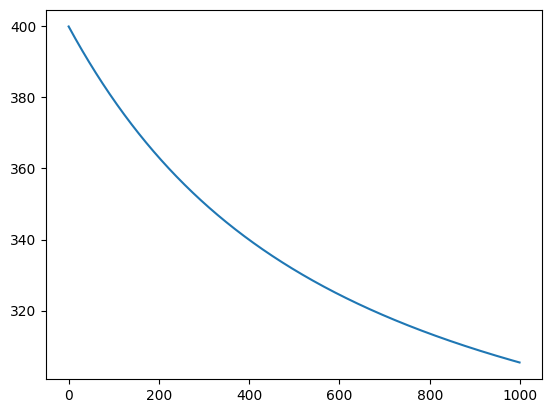

Accuracy of the model is :  100.0 %


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


train = pd.read_csv("train-LR.csv")
test = pd.read_csv("test.csv")

train=train.drop(['Name'], axis=1)


train_data = train.values
X = train_data[:, 1:]
Y = train_data[:, : 1]

test_data = test.values
Y_test = train_data[:, : 1]
X_test = train_data[:, 1:]

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def model(P, Y, learning_rate, iterations):
    
    m = X.shape[1]
    n = X.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, P) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, P.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list


iterations = 1000
learning_rate = 0.000000015
W, B, cost_list = model(X, Y, learning_rate = learning_rate, iterations = iterations)

plt.plot(np.arange(iterations), cost_list)
plt.show()

def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - (1 / X_test.shape[0]) *(np.sum(np.abs(A - Y))/Y.shape[1]))*100
    
 #error = (1 / X_test.shape[0]) * np.sum(np.abs((y_pred - Y_test) / Y_test))

    
    print("Accuracy of the model is : ", acc, "%")

accuracy(X_test, Y_test, W, B)